# Electronics HW1


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

## 1-1

(0.0045, 0.03)

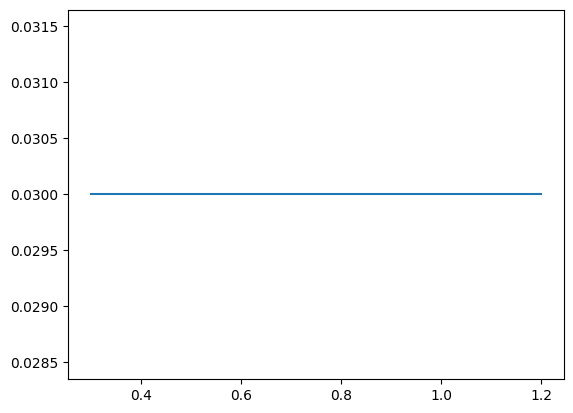

In [27]:
# (a)
unCox = 500e-6  # A/V^2
W_L = 200
V_b = 0.5  # V
V_TH = 0.2  # V

V_GS = V_b

# Drain-source voltage range for saturation region
V_DS = np.linspace(0.3, 1.2, 100)

# Drain current in saturation region
I_D_max = 0.5 * unCox * W_L * (V_GS - V_TH)**2

# Transconductance in saturation is constant
gm = 2 * I_D_max / (V_GS - V_TH)

# Plot transconductance in saturation
fig1 = plt.plot(V_DS, np.full_like(V_DS, gm), label='Saturation Region')
I_D_max, gm


(np.float64(0.0), np.float64(0.03))

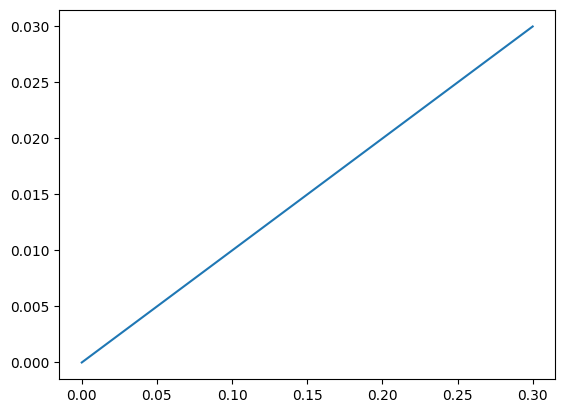

In [28]:
# (b)
V_DS = np.linspace(0, 0.3, 100)

# Transconductance in triode region
gm = unCox * W_L * V_DS

# Plot transconductance in linear region
fig2 = plt.plot(V_DS, gm, label='Triode Region')
gm[0], gm[-1]

In [14]:
# (c)
lambda_clm = 0.1
V_DS = 1.2

I_D = 0.5 * unCox * W_L * (V_GS - V_TH)**2 * (1 + lambda_clm * V_DS)
r_o = 1 / (lambda_clm * I_D_max)
gm = np.sqrt(2 * unCox * W_L * I_D)

intrinsic_gain = gm * r_o
I_D, r_o, gm, intrinsic_gain


(0.00504,
 2222.222222222222,
 np.float64(0.03174901573277509),
 np.float64(70.55336829505575))

## 1-2

In [15]:
# fig 2.
# (Vin - vgs1 - Vout)/ro1 + (-Vout)/RD = gm1 * vgs1
# gm1 * vgs1 = (Vin - vgs1 - Vout)/ro1 + (Vin - vgs1)/ro2
# (Vin - vgs1)/ro2 = (-Vout)/RD
# A = Vout / Vin

gm1, gm2, ro1, ro2, RD = symbols('gm1 gm2 ro1 ro2 RD')
vgs1 = symbols('vgs1')
A, Vin, Vout = symbols('A Vin Vout')

eq1 = Eq((Vin - vgs1 - Vout)/ro1 + (-Vout)/RD, gm1 * vgs1)
eq2 = Eq(gm1 * vgs1, (Vin - vgs1 - Vout)/ro1 + (Vin - vgs1)/ro2)
eq3 = Eq((Vin - vgs1)/ro2, (-Vout)/RD)
eq4 = Eq(A, Vout / Vin)

solve((eq1, eq2, eq3, eq4), (A, Vout, Vin), dict=True)

[{A: -RD*gm1*ro1/(RD + gm1*ro1*ro2 + ro1 + ro2),
  Vin: vgs1*(RD + gm1*ro1*ro2 + ro1 + ro2)/(RD + ro1 + ro2),
  Vout: -RD*gm1*ro1*vgs1/(RD + ro1 + ro2)}]

In [16]:
# fig 3.
# gm1 * (Vin - Vout) = gm2 * Vin + Vout/(ro1 * ro2 / (ro1 + ro2))
# A = Vout / Vin

gm1, gm2, ro1, ro2 = symbols('gm1 gm2 ro1 ro2')
A, Vin, Vout = symbols('A Vin Vout')

eq1 = Eq(gm2 * Vin - gm1 * (Vin - Vout), -Vout/(ro1 * ro2 / (ro1 + ro2)))
eq2 = Eq(A, Vout / Vin)

solve((eq1, eq2), (A, Vout, Vin), dict=True)

[{A: ro1*ro2*(gm1 - gm2)/(gm1*ro1*ro2 + ro1 + ro2),
  Vin: Vout*(gm1*ro1*ro2 + ro1 + ro2)/(ro1*ro2*(gm1 - gm2))}]

## 1-3

In [17]:
# gm1 * Vin + gm2 * Vin = -Vout / ro1 || ro2

gm1, gm2, ro1, ro2 = symbols('gm1 gm2 ro1 ro2')
A, Vin, Vout = symbols('A Vin Vout')

eq1 = Eq(gm1 * Vin + gm2 * Vin, -Vout / (ro1 * ro2 / (ro1 + ro2)))
eq2 = Eq(A, Vout / Vin)

solve((eq1, eq2), (A, Vout, Vin), dict=True)

[{A: -ro1*ro2*(gm1 + gm2)/(ro1 + ro2),
  Vin: -Vout*(ro1 + ro2)/(ro1*ro2*(gm1 + gm2))}]

## 1-4

In [18]:
# fig 4.
# gm * Vin = -Vout / ro - Vout / RD
# A = Vout / Vin

gm, ro, RD = symbols('gm ro RD')
Vin, Vout = symbols('Vin Vout')
A = symbols('A')

eq1 = Eq(gm * Vin, -Vout / ro - Vout / RD)
eq2 = Eq(A, Vout / Vin)

solve((eq1, eq2), (A, Vout, Vin), dict=True)

[{A: -RD*gm*ro/(RD + ro), Vin: -Vout*(RD + ro)/(RD*gm*ro)}]